# Import dependencies and determine working directory

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import NLP dictionaries
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# get current directory
dir = os.path.dirname(os.path.abspath('__file__'))

# Load pre-processed data

In [38]:
# Load df from a csv (approx 5 mins)
file_path = os.path.join(dir, '02_processed_data','restaurant_reviews.csv')
joint_df = pd.read_csv(file_path, index_col = False, parse_dates= ['date'])

# Vectorize data
## Define vectorizer

In [21]:
# Initialize scikit-learn's bag of words tool -  "CountVectorizer"
# Source: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
n_features = 3000
vectorizer = CountVectorizer(analyzer = 'word',
                             max_features = n_features,
                             max_df=0.95, 
                             min_df=2).fit(" ".join(line) for line in joint_df['processed_review'])
print (len(vectorizer.vocabulary_))

3000


## Vectorize text

In [22]:
# Vectorize text and convert the result to an Numpy array
vectorized_text = vectorizer.transform(" ".join(line) for line in joint_df['processed_review'])
vectorized_text_array = vectorized_text.toarray()

## Explore word vector properties and most common words

In [23]:
# Get list of words in the vocabulary
vocab = vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(vectorized_text_array, axis=0)

# Explore vector metrics
print ('sparse matrix shape:', vectorized_text.shape)
print ('number of non-zeros:', vectorized_text.nnz)
print ('sparsity: %.2f%%' % (100.0 * vectorized_text.nnz / (vectorized_text.shape[0] * vectorized_text.shape[1])))

# Print most used words in reverse order
print( pd.Series( dict(list(zip(vocab, dist))) ).sort_values( ascending = False) )

sparse matrix shape: (2876509, 3000)
number of non-zeros: 119826809
sparsity: 1.39%
food            2293171
good            1892858
place           1889152
great           1344620
service         1180824
time            1178872
like            1131077
one             1004655
get              938087
back             863566
go               857214
really           827370
restaurant       826086
would            821958
ordered          700710
order            698338
also             658247
chicken          643743
menu             595335
got              580615
nice             557659
best             555557
come             543735
well             541939
came             533220
try              531427
delicious        526938
table            519562
even             514624
love             504504
                 ...   
deliciously        5203
sriracha           5203
macaroon           5199
politely           5199
remove             5197
americanized       5195
eager              5195
caro

# Explore the vector

In [24]:
# Sum up the word counts of each review
review_words = np.sum(vectorized_text_array, axis=1)
print(review_words)

[23 36 56 ..., 64 33 28]


Mean : 50.1913590397


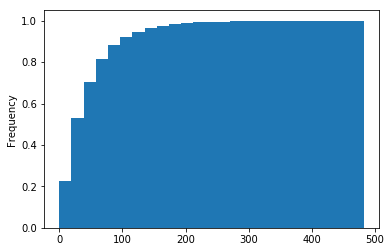

In [25]:
print( 'Mean :', np.mean(review_words) )
review_word_count = pd.Series(review_words)
review_word_count.plot(kind='hist', bins=25, normed=True, cumulative=True)
plt.show()

## Save vectorized text array

In [ ]:
# Save vectorized text into a npy
# https://stackoverflow.com/questions/28439701/how-to-save-and-load-numpy-array-data-properly
filename_out = os.path.join(dir, '02_processed_data','vectorized_reviews.npy')
np.save(filename_out, vectorized_text_array)    # .npy extension is added if not given

# note to load use vectorized_text_array = np.load(filename_out)